# Kickstarter Campaign Analysis 
**Goal:** This project intends to clean, explore, and analyze data from kickstarter campaigns. Using the available data, we will attempt to answer 4 questions. 

1) What is the best project type? 

2) What is the best pledge goal?

3) Is there a best length of time to run a campaign?

4) Is there an ideal month/day/time to launch the campaign?

Our metrics of interest are daily average pledges, total pledge amounts, and campaign success rates. 
We will often look at the median of these metrics assuming it is a better indicator of the typical campaign because it is more insulated from skill level/campaign quality.


In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import plotly.express as px

In [51]:
####Campaign List
GA_APP = pd.read_csv("/Users/james/Desktop/General_Assembly/DSI_kickstarterscrape_dataset.csv", encoding = "ISO-8859-1")
GA_APP.head()

project id                                               name  \
0       39409                              WHILE THE TREES SLEEP   
1      126581               Educational Online Trading Card Game   
2      138119                                              STRUM   
3      237090  GETTING OVER - One son's search to finally kno...   
4      246101  The Launch of FlyeGrlRoyalty &quot;The New Nam...   

                                                 url      category  \
0  http://www.kickstarter.com/projects/emiliesaba...  Film & Video   
1  http://www.kickstarter.com/projects/972789543/...         Games   
2  http://www.kickstarter.com/projects/185476022/...  Film & Video   
3  http://www.kickstarter.com/projects/charnick/g...  Film & Video   
4  http://www.kickstarter.com/projects/flyegrlroy...       Fashion   

          subcategory         location      status     goal  pledged  \
0          Short Film     Columbia, MO  successful  10500.0  11545.0   
1  Board & Card Games    Maplewood, NJ      failed   4000.0     20.0   
2           Animation  Los Angeles, CA        live  20000.0     56.0   
3         Documentary  Los Angeles, CA  successful   6000.0   6535.0   
4             Fashion         Novi, MI      failed   3500.0      0.0   

   funded percentage  backers                      funded date  levels  \
0           1.099524       66  Fri, 19 Aug 2011 19:28:17 -0000       7   
1           0.005000        2  Mon, 02 Aug 2010 03:59:00 -0000       5   
2           0.002800        3  Fri, 08 Jun 2012 00:00:31 -0000      10   
3           1.089167      100  Sun, 08 Apr 2012 02:14:00 -0000      13   
4           0.000000        0  Wed, 01 Jun 2011 15:25:39 -0000       6   

                                       reward levels  updates  comments  \
0               $25,$50,$100,$250,$500,$1,000,$2,500       10         2   
1                                  $1,$5,$10,$25,$50        6         0   
2  $1,$10,$25,$40,$50,$100,$250,$1,000,$1,337,$9,001        1         0   
3  $1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500...        4         0   
4                         $10,$25,$50,$100,$150,$250        2         0   

   duration  
0     30.00  
1     47.18  
2     28.00  
3     32.22  
4     30.00

In [52]:
####Q1: Find the mean of amounts raised by campaigns.
GA_APP.describe()

project id          goal       pledged  funded percentage  \
count  4.595700e+04  4.595700e+04  4.594500e+04       45957.000000   
mean   1.080800e+09  1.194271e+04  4.980750e+03           1.850129   
std    6.218057e+08  1.887583e+05  5.674162e+04          88.492706   
min    3.940900e+04  1.000000e-02  0.000000e+00           0.000000   
25%    5.438962e+08  1.800000e+03  1.960000e+02           0.044000   
50%    1.078345e+09  4.000000e+03  1.310000e+03           1.000000   
75%    1.621596e+09  9.862000e+03  4.165000e+03           1.115640   
max    2.147460e+09  2.147484e+07  1.026684e+07       15066.000000   

            backers        levels      updates      comments      duration  
count  45957.000000  45957.000000  45957.00000  45957.000000  45957.000000  
mean      69.973192      8.004939      4.08508      8.379529     39.995547  
std      688.628479      4.233907      6.43922    174.015737     17.414458  
min        0.000000      0.000000      0.00000      0.000000      1.000000  
25%        5.000000      5.000000      0.00000      0.000000     30.000000  
50%       23.000000      7.000000      2.00000      0.000000     32.000000  
75%       59.000000     10.000000      6.00000      3.000000     48.390000  
max    87142.000000     80.000000    149.00000  19311.000000     91.960000

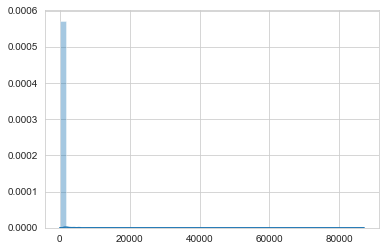

In [53]:
####Q2: Find the skew of the backers column:
sns.distplot(GA_APP[['backers']])

In [54]:
GA_APP[['backers']].skew(axis=0)

backers    87.473974
dtype: float64

**Conclusion:** Right Skewed: 87.473974. Positive skew indicates longer tail on positive side of peak. 

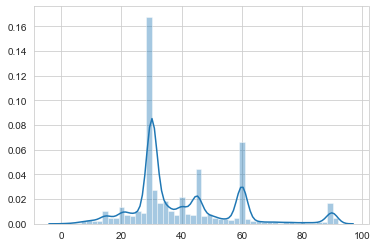

In [55]:
###Q3: Is duration normally distributed? 
sns.distplot(GA_APP[['duration']])

**Conclusion:** Duration is not normally distributed.

# Data Cleaning

**Step 1:** One hot code status variable indicating whether a campaign was successful or not. 

In [56]:
y = pd.get_dummies(GA_APP[['status']], prefix='status')
print(y.head())

   status_canceled  status_failed  status_live  status_successful  \
0                0              0            0                  1   
1                0              1            0                  0   
2                0              0            1                  0   
3                0              0            0                  1   
4                0              1            0                  0   

   status_suspended  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  


In [57]:
###Merge on One Hot Coded Columns with Original Data:  
GA_APP_full = GA_APP.merge(y, how='outer', left_index=True, right_index=True)



**Step 2:** Review categorical variables of interest for mistakes or overlapping values and check for null values. In descriptions of Project Types, we see Film & Video needs to be combined and in subcategory descriptions we find country folk and board games. 

In [58]:
GA_APP_full.isnull().sum(axis = 0)

project id              0
name                    0
url                     0
category                0
subcategory             0
location             1322
status                  0
goal                    0
pledged                12
funded percentage       0
backers                 0
funded date             0
levels                  0
reward levels          59
updates                 0
comments                0
duration                0
status_canceled         0
status_failed           0
status_live             0
status_successful       0
status_suspended        0
dtype: int64

In [59]:
GA_APP_full['category'].value_counts()

Film &amp; Video    13053
Music               10913
Publishing           4770
Art                  3992
Theater              2492
Design               1768
Games                1738
Photography          1514
Food                 1439
Fashion              1136
Comics               1072
Technology            811
Dance                 761
Film & Video          498
Name: category, dtype: int64

In [60]:
GA_APP_full['subcategory'].value_counts()

Documentary               4012
Short Film                3942
Music                     3243
Film &amp; Video          2495
Theater                   2492
Indie Rock                1939
Rock                      1791
Narrative Film            1554
Photography               1514
Food                      1439
Fashion                   1136
Webseries                 1122
Fiction                   1099
Art                       1076
Comics                    1072
Nonfiction                1062
Product Design            1053
Video Games                911
Country &amp; Folk         808
Dance                      761
Pop                        746
Publishing                 673
Children's Book            653
Public Art                 564
Painting                   518
Performance Art            506
Classical Music            482
Hip-Hop                    477
Jazz                       447
Mixed Media                444
Board &amp; Card Games     442
Journalism                 431
World Mu

In [61]:
#Combine Similar Categories
GA_APP_full['category'] = GA_APP_full['category'].replace(['Film &amp; Video'],'Film & Video')
GA_APP_full['subcategory'] = GA_APP_full['subcategory'].replace(['Board &amp; Card Games','Country &amp; Folk','Film &amp; Video'],['Board & Card Games','Country & Folk', 'Other Film and Video'])


**Step 3:** Create new columns with calculations of interest. Since we have duration data, we are particularly interested in average $ raised per day. We also want to create a continuous variable that will indicate what portion of donations requested was funded. Finally, we want to create a number of categorical variables to explore the effects of starting with different pledge goals and using different campaign lengths.  

In [62]:
####This gives us a variable with the average amount raised per day. 
GA_APP_full['Avg_Raised_Per_Day']=GA_APP_full['pledged']/GA_APP_full['duration']

In [63]:
####This gives us a variable with the portion of the campaign goal funded. 
GA_APP_full['Percent_Pledged']=GA_APP_full['pledged']/GA_APP_full['goal']

In [64]:
####Create Categorical Variable for Campaign Goal ($250 increments) ####

GA_APP_full['Goal_Cat'] = '0-250'
GA_APP_full.loc[(GA_APP_full['goal'] > 250) & (GA_APP_full['goal'] <= 500), 'Goal_Cat'] = '250-500'
GA_APP_full.loc[(GA_APP_full['goal'] > 500) & (GA_APP_full['goal'] <= 750), 'Goal_Cat'] = '500-750'
GA_APP_full.loc[(GA_APP_full['goal'] > 750) & (GA_APP_full['goal'] <= 1000), 'Goal_Cat'] = '750-1000'
GA_APP_full.loc[(GA_APP_full['goal'] > 1000) & (GA_APP_full['goal'] <= 1250), 'Goal_Cat'] = '1000-1250'
GA_APP_full.loc[(GA_APP_full['goal'] > 1250) & (GA_APP_full['goal'] <= 1500), 'Goal_Cat'] = '1250-1500'
GA_APP_full.loc[(GA_APP_full['goal'] > 1500) & (GA_APP_full['goal'] <= 1750), 'Goal_Cat'] = '1500-1750'
GA_APP_full.loc[(GA_APP_full['goal'] > 1750) & (GA_APP_full['goal'] <= 2000), 'Goal_Cat'] = '1750-2000'
GA_APP_full.loc[(GA_APP_full['goal'] > 2000) & (GA_APP_full['goal'] <= 2250), 'Goal_Cat'] = '2000-2250'
GA_APP_full.loc[(GA_APP_full['goal'] > 2250) & (GA_APP_full['goal'] <= 2500), 'Goal_Cat'] = '2250-2500'
GA_APP_full.loc[(GA_APP_full['goal'] > 2500) & (GA_APP_full['goal'] <= 2750), 'Goal_Cat'] = '2500-2750'
GA_APP_full.loc[(GA_APP_full['goal'] > 2750) & (GA_APP_full['goal'] <= 3000), 'Goal_Cat'] = '2750-3000'
GA_APP_full.loc[(GA_APP_full['goal'] > 3000) & (GA_APP_full['goal'] <= 3250), 'Goal_Cat'] = '3000-3250'
GA_APP_full.loc[(GA_APP_full['goal'] > 3250) & (GA_APP_full['goal'] <= 3500), 'Goal_Cat'] = '3250-3500'
GA_APP_full.loc[(GA_APP_full['goal'] > 3500) & (GA_APP_full['goal'] <= 3750), 'Goal_Cat'] = '3500-3750'
GA_APP_full.loc[(GA_APP_full['goal'] > 3750) & (GA_APP_full['goal'] <= 4000), 'Goal_Cat'] = '3750-4000'
GA_APP_full.loc[(GA_APP_full['goal'] > 4000) & (GA_APP_full['goal'] <= 4250), 'Goal_Cat'] = '4000-4250'
GA_APP_full.loc[(GA_APP_full['goal'] > 4250) & (GA_APP_full['goal'] <= 4500), 'Goal_Cat'] = '4250-4500'
GA_APP_full.loc[(GA_APP_full['goal'] > 4500) & (GA_APP_full['goal'] <= 4750), 'Goal_Cat'] = '4500-4750'
GA_APP_full.loc[(GA_APP_full['goal'] > 4750) & (GA_APP_full['goal'] <= 5000), 'Goal_Cat'] = '4750-5000'
GA_APP_full.loc[(GA_APP_full['goal'] > 5000) & (GA_APP_full['goal'] <= 5250), 'Goal_Cat'] = '5000-5250'
GA_APP_full.loc[(GA_APP_full['goal'] > 5250) & (GA_APP_full['goal'] <= 5500), 'Goal_Cat'] = '5250-5500'
GA_APP_full.loc[(GA_APP_full['goal'] > 5500) & (GA_APP_full['goal'] <= 5750), 'Goal_Cat'] = '5500-5750'
GA_APP_full.loc[(GA_APP_full['goal'] > 5750) & (GA_APP_full['goal'] <= 6000), 'Goal_Cat'] = '5750-6000'
GA_APP_full.loc[(GA_APP_full['goal'] > 6000) & (GA_APP_full['goal'] <= 6250), 'Goal_Cat'] = '6000-6250'
GA_APP_full.loc[(GA_APP_full['goal'] > 6250), 'Goal_Cat'] = '6250+'

GA_APP_full=GA_APP_full.sort_values('goal',ascending=True)
####This creates a seperate column assigning integers to each category for ordering purposes. 
GA_APP_full['Goal_Cat_Num']=GA_APP_full['Goal_Cat'].astype("category").cat.codes


In [65]:
####Create Categorical Variable for Campaign Goal ($1000 increments) ####

GA_APP_full['Goal_Cat_1000'] = '12000+'
GA_APP_full.loc[(GA_APP_full['goal'] > 0) & (GA_APP_full['goal'] <= 1000), 'Goal_Cat_1000'] = '0-1000'
GA_APP_full.loc[(GA_APP_full['goal'] > 1000) & (GA_APP_full['goal'] <= 2000), 'Goal_Cat_1000'] = '1000-2000'
GA_APP_full.loc[(GA_APP_full['goal'] > 2000) & (GA_APP_full['goal'] <= 3000), 'Goal_Cat_1000'] = '2000-3000'
GA_APP_full.loc[(GA_APP_full['goal'] > 3000) & (GA_APP_full['goal'] <= 4000), 'Goal_Cat_1000'] = '3000-4000'
GA_APP_full.loc[(GA_APP_full['goal'] > 4000) & (GA_APP_full['goal'] <= 5000), 'Goal_Cat_1000'] = '4000-5000'
GA_APP_full.loc[(GA_APP_full['goal'] > 5000) & (GA_APP_full['goal'] <= 6000), 'Goal_Cat_1000'] = '5000-6000'
GA_APP_full.loc[(GA_APP_full['goal'] > 6000) & (GA_APP_full['goal'] <= 7000), 'Goal_Cat_1000'] = '6000-7000'
GA_APP_full.loc[(GA_APP_full['goal'] > 7000) & (GA_APP_full['goal'] <= 8000), 'Goal_Cat_1000'] = '7000-8000'
GA_APP_full.loc[(GA_APP_full['goal'] > 8000) & (GA_APP_full['goal'] <= 9000), 'Goal_Cat_1000'] = '8000-9000'
GA_APP_full.loc[(GA_APP_full['goal'] > 9000) & (GA_APP_full['goal'] <= 10000), 'Goal_Cat_1000'] = '9000-10000'
GA_APP_full.loc[(GA_APP_full['goal'] > 10000) & (GA_APP_full['goal'] <= 11000), 'Goal_Cat_1000'] = '10000-11000'
GA_APP_full.loc[(GA_APP_full['goal'] > 11000) & (GA_APP_full['goal'] <= 12000), 'Goal_Cat_1000'] = '11000-12000'

GA_APP_full=GA_APP_full.sort_values('goal',ascending=True)
####This creates a seperate column assigning integers to each category for ordering purposes. 
GA_APP_full['Goal_Cat_Num_1000']=GA_APP_full['Goal_Cat_1000'].astype("category").cat.codes

In [66]:
####Create Categorical Variable for Campaign Durations (5 day increments) ####
GA_APP_full['Duration_Cat'] = '0-5'
GA_APP_full.loc[(GA_APP_full['duration'] > 5) & (GA_APP_full['duration'] <= 10), 'Duration_Cat'] = '5-10'
GA_APP_full.loc[(GA_APP_full['duration'] > 10) & (GA_APP_full['duration'] <= 15), 'Duration_Cat'] = '10-15'
GA_APP_full.loc[(GA_APP_full['duration'] > 15) & (GA_APP_full['duration'] <= 20), 'Duration_Cat'] = '15-20'
GA_APP_full.loc[(GA_APP_full['duration'] > 20) & (GA_APP_full['duration'] <= 25), 'Duration_Cat'] = '20-25'
GA_APP_full.loc[(GA_APP_full['duration'] > 25) & (GA_APP_full['duration'] <= 30), 'Duration_Cat'] = '25-30'
GA_APP_full.loc[(GA_APP_full['duration'] > 30) & (GA_APP_full['duration'] <= 35), 'Duration_Cat'] = '30-35'
GA_APP_full.loc[(GA_APP_full['duration'] > 35) & (GA_APP_full['duration'] <= 40), 'Duration_Cat'] = '35-40'
GA_APP_full.loc[(GA_APP_full['duration'] > 40) & (GA_APP_full['duration'] <= 45), 'Duration_Cat'] = '40-45'
GA_APP_full.loc[(GA_APP_full['duration'] > 45) & (GA_APP_full['duration'] <= 50), 'Duration_Cat'] = '45-50'
GA_APP_full.loc[(GA_APP_full['duration'] > 50) & (GA_APP_full['duration'] <= 55), 'Duration_Cat'] = '50-55'
GA_APP_full.loc[(GA_APP_full['duration'] > 55) & (GA_APP_full['duration'] <= 60), 'Duration_Cat'] = '55-60'
GA_APP_full.loc[(GA_APP_full['duration'] > 60) & (GA_APP_full['duration'] <= 65), 'Duration_Cat'] = '60-65'
GA_APP_full.loc[(GA_APP_full['duration'] > 65) & (GA_APP_full['duration'] <= 70), 'Duration_Cat'] = '65-70'
GA_APP_full.loc[(GA_APP_full['duration'] > 70) & (GA_APP_full['duration'] <= 75), 'Duration_Cat'] = '70-75'
GA_APP_full.loc[(GA_APP_full['duration'] > 75) & (GA_APP_full['duration'] <= 80), 'Duration_Cat'] = '75-80'
GA_APP_full.loc[(GA_APP_full['duration'] > 80), 'Duration_Cat'] = '80+'

**Step 4:** Create workable time stamps from date data. We are interested in looking at the effect of different start times. i.e. month. This requires converting campaign end time data to time stamp objects, creating a number of categorical variables, and converting duration data to    

In [67]:
####Clean up time strings to allow for conversion to time stamps. 

#Split day of the week into its own column by delimineator: , 
GA_APP_full[['funded date','date']] = GA_APP_full['funded date'].str.split(',',expand=True)

#Remove unnecessary strings and spaces
GA_APP_full['date'] = GA_APP_full['date'].map(lambda x: x.rstrip('-0000'))
###Remove left and right side spaces
GA_APP_full['date'] = GA_APP_full['date'].map(lambda x: x.rstrip(' ').lstrip(' '))
##I chose to add a seperator - before converting
GA_APP_full['date']=GA_APP_full['date'].str.replace(' ', '-')
GA_APP_full['date']=GA_APP_full['date'].str.replace(':', '')

###This creates a new column with just the month since it is the only letters.
GA_APP_full['Funded_Month']=GA_APP_full['date'].str.extract('([A-Za-z]+)')


In [68]:
###Create timestamp column and convert remaining date string to time stamp. 
GA_APP_full['timestamp']=GA_APP_full['date']
GA_APP_full['timestamp']=pd.to_datetime(GA_APP_full['timestamp'], format="%d-%b-%Y-%H%M%S")

In [69]:
#####Convert duration to a time delta object so it can be subtracted from the time stamp.
GA_APP_full['time_delta_duration'] = pd.to_timedelta(GA_APP_full['duration'],'d')

In [70]:
###Find start time by subtracting the time delta duration from end timestamp:
GA_APP_full['Start_Date']=GA_APP_full['timestamp']-GA_APP_full['time_delta_duration']

In [71]:
GA_APP_full['Start_Date'].head()

13057   2009-11-25 06:50:12
4637    2011-07-12 13:59:39
34260   2011-04-15 21:47:12
28003   2010-01-09 22:43:12
36247   2011-10-30 01:34:01
Name: Start_Date, dtype: datetime64[ns]

In [72]:
#Use time stamp to create numeric columns representing start time, day of week, month, and year. 
GA_APP_full['Start_Year'] = GA_APP_full['Start_Date'].dt.year
GA_APP_full['Start_Month'] = GA_APP_full['Start_Date'].dt.month
GA_APP_full['Start_DayofWeek'] = GA_APP_full['Start_Date'].dt.dayofweek 
GA_APP_full['Start_Hour'] = GA_APP_full['Start_Date'].dt.hour

In [73]:
####Create categorical columns with the day, month, year names:
#Days
day_categories = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
GA_APP_full['Start_DayofWeek_str'] = [day_categories[x] for x in GA_APP_full['Start_DayofWeek']]
GA_APP_full['Start_DayofWeek_str'].value_counts()

Tuesday      8181
Thursday     8040
Wednesday    7901
Friday       7156
Monday       7038
Saturday     4405
Sunday       3236
Name: Start_DayofWeek_str, dtype: int64

In [74]:
#Months
month_categories = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}
GA_APP_full['Start_Month_str'] = [month_categories[x] for x in GA_APP_full['Start_Month']]
GA_APP_full['Start_Month_str'].value_counts()


May          6273
April        5611
March        5352
February     4496
January      3764
November     3285
October      2993
June         2989
December     2908
September    2849
July         2786
August       2651
Name: Start_Month_str, dtype: int64

In [75]:
#Time
time_categories = {0:'12am', 1:'1am', 2:'2am', 3:'3am', 4:'4am', 5:'5am', 6:'6am', 7:'7am', 8:'8am', 9:'9am', 10:'10am', 11:'11am',12:'12pm', 13:'1pm', 14:'2pm', 15:'3pm', 16:'4pm', 17:'5pm', 18:'6pm', 19:'7pm', 20:'8pm', 21:'9pm', 22:'10pm', 23:'11pm'}
GA_APP_full['Start_Hour_str'] = [time_categories[x] for x in GA_APP_full['Start_Hour']]
GA_APP_full['Start_Hour_str'].value_counts()

8pm     3036
7pm     3018
10pm    2988
9pm     2940
6pm     2792
11pm    2784
5pm     2760
4pm     2535
12am    2528
1am     2340
2am     2250
3am     2237
3pm     2091
4am     2062
5am     1718
2pm     1703
6am     1298
1pm     1218
7am      941
12pm     742
8am      652
11am     489
9am      434
10am     401
Name: Start_Hour_str, dtype: int64

# Data Exploration:
Now that we have created columns of interest, we will start to explore what it means to be a successful kickstarter campaign. We want to answer the following questions:

1) What is the best project type? 

2) What is the best pledge goal?

3) Is there a best length of time to run a campaign?

4) Is there an ideal month/day/time to launch the campaign?
 


### Best Project Type: 
In deciding what types of projects are best, we decided to look at which projects most often meet or exceed their pledge goal. To make this determination, we will use our the category/subcategory variabel and one hot coded status_successful variable.   

**Step 1**: Remove all active campaigns from pool and view success rates for by campaign type. 

In [76]:
GA_APP_full_no_live_campaign=GA_APP_full[GA_APP_full['status']!='live']


In [77]:
##View success rate by category
success_stat = GA_APP_full_no_live_campaign.groupby(['category'])['status_successful', 'status_failed'].mean()
success_stat.sort_values('status_successful',ascending=False)



status_successful  status_failed
category                                      
Dance                  0.745403       0.254597
Theater                0.707149       0.292851
Music                  0.675015       0.324091
Art                    0.570577       0.429423
Comics                 0.537190       0.462810
Film & Video           0.508994       0.489104
Food                   0.503459       0.494235
Photography            0.465032       0.534968
Design                 0.464331       0.533121
Games                  0.429926       0.563304
Publishing             0.401200       0.596399
Technology             0.390541       0.605405
Fashion                0.328754       0.671246

In [78]:
#View success rate by sub category

success_sub_stat = GA_APP_full_no_live_campaign.groupby(['subcategory'])['status_successful', 'status_failed'].mean()

#Sort by Success Rate
success_sub_stat=success_sub_stat.sort_values('status_successful',ascending=False)

success_sub_stat.head()

status_successful  status_failed
subcategory                                      
Indie Rock                0.746975       0.251925
Country & Folk            0.745711       0.253280
Dance                     0.745403       0.254597
Classical Music           0.743056       0.254630
Jazz                      0.720482       0.279518

**Conclusion:** It appears Indie Rock projects have the highest success rates. To get a fuller picture and make sure no campaign is underrepresented, we will add median average daily pledge and number of campaigns to the data. 

In [79]:
###Create columns for number of campaigns in each group, del failed, merge, and rename columns. 
del success_sub_stat['status_failed']
success_sub_stat2 = GA_APP_full_no_live_campaign.groupby(['subcategory'])['status_successful'].count()
success_sub_stat3 = success_sub_stat.merge(success_sub_stat2, how='outer', left_index=True, right_index=True)
success_sub_stat3.rename(columns = {'status_successful_x':'Success Rate', 
                              'status_successful_y':'Number_of_Campaigns'}, inplace = True)

In [80]:
###Create columns for median average raised per day in each group and merge. 
success_stat_Per_Day_Raised = GA_APP_full_no_live_campaign.groupby(['subcategory'])['Avg_Raised_Per_Day'].median()
success_sub_stat3 = success_sub_stat3.merge(success_stat_Per_Day_Raised, how='outer', left_index=True, right_index=True)
success_sub_stat3.rename(columns = {'Avg_Raised_Per_Day':'Median of Avg Daily Pledge'}, inplace = True)
success_sub_stat3=success_sub_stat3.sort_values('Success Rate',ascending=False)
success_sub_stat3

Success Rate  Number_of_Campaigns  \
subcategory                                               
Indie Rock                0.746975                 1818   
Country & Folk            0.745711                  991   
Dance                     0.745403                  707   
Classical Music           0.743056                  432   
Jazz                      0.720482                  415   
Theater                   0.707149                 2322   
Rock                      0.684856                 1631   
Pop                       0.660405                  692   
Public Art                0.658153                  509   
Music                     0.646824                 3007   
World Music               0.637076                  383   
Short Film                0.614115                 3755   
Art                       0.603960                 1010   
Graphic Design            0.591463                  164   
Illustration              0.590426                  188   
Performance Art           0.585683                  461   
Conceptual Art            0.580838                  167   
Open Hardware             0.567251                  171   
Games                     0.563786                  243   
Electronic Music          0.560886                  271   
Board & Card Games        0.552966                  472   
Sculpture                 0.539394                  330   
Comics                    0.537190                  968   
Art Book                  0.524917                  301   
Periodical                0.520913                  263   
Design                    0.507634                  262   
Food                      0.503459                 1301   
Painting                  0.501035                  483   
Narrative Film            0.492210                 1412   
Digital Art               0.485075                  134   
Mixed Media               0.484108                  409   
Documentary               0.480961                 3703   
Journalism                0.472772                  404   
Photography               0.465032                 1387   
Crafts                    0.458515                  229   
Other Film and Video      0.454158                 2345   
Poetry                    0.435000                  200   
Product Design            0.430601                  915   
Webseries                 0.420078                 1026   
Publishing                0.391234                  616   
Animation                 0.383598                  378   
Hip-Hop                   0.379147                  422   
Nonfiction                0.372460                  886   
Fiction                   0.369085                  951   
Technology                0.362538                  331   
Fashion                   0.328754                 1019   
Children's Book           0.323529                  544   
Video Games               0.311024                  762   
Open Software             0.302521                  238   

                      Median of Avg Daily Pledge  
subcategory                                       
Indie Rock                             56.654406  
Country & Folk                         71.702244  
Dance                                  59.250000  
Classical Music                        61.824522  
Jazz                                   76.119855  
Theater                                53.910886  
Rock                                   46.532438  
Pop                                    56.955152  
Public Art                             53.266332  
Music                                  52.868852  
World Music                            70.166667  
Short Film                             43.924089  
Art                                    43.184160  
Graphic Design                         36.534533  
Illustration                           35.148810  
Performance Art                        31.375000  
Conceptual Art                         30.033333  
Open Hardware                         112.7

**Conclusion**: The new columns inform us that some lower success rate project types like Product Design and Open Hardware generate more daily returns. This could very well be an indication of higher initial goals. We defined success as meeting your goal but it is important to realize their are many definitions of success. 

In [81]:
##Clean up the table and show only top 10 by success rate:
success_stories=success_sub_stat3[success_sub_stat3['Success Rate']>.64]
success_stories['Success Rate']=success_stories['Success Rate']*100
success_stories['Success Rate']=round(success_stories['Success Rate'],2)
success_stories['Median of Avg Daily Pledge']=round(success_stories['Median of Avg Daily Pledge'],2)
success_stories2=success_stories.sort_values('Success Rate',ascending=False)
success_stories2['Success Rate']=success_stories2['Success Rate'].astype(str)+str('%')
success_stories2

/Users/james/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/james/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/james/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

Success Rate  Number_of_Campaigns  Median of Avg Daily Pledge
subcategory                                                                  
Indie Rock             74.7%                 1818                       56.65
Country & Folk        74.57%                  991                       71.70
Dance                 74.54%                  707                       59.25
Classical Music       74.31%                  432                       61.82
Jazz                  72.05%                  415                       76.12
Theater               70.71%                 2322                       53.91
Rock                  68.49%                 1631                       46.53
Pop                   66.04%                  692                       56.96
Public Art            65.82%                  509                       53.27
Music                 64.68%                 3007                       52.87

### Best Pledge Goal: 

We will now look at the effect of pledge goal on success. Looking at the summary statistics for the goal column we see kickstarter campaigns have a wide range of goals. Some in the millions. 

In [82]:
GA_APP_full['goal'].describe()

count    4.595700e+04
mean     1.194271e+04
std      1.887583e+05
min      1.000000e-02
25%      1.800000e+03
50%      4.000000e+03
75%      9.862000e+03
max      2.147484e+07
Name: goal, dtype: float64

In [83]:
sdf_1000 = GA_APP_full.groupby(['Goal_Cat_Num_1000']).status_successful.sum()
fdf_1000 = GA_APP_full.groupby(['Goal_Cat_Num_1000']).status_failed.sum()
fdf_1000=pd.DataFrame(fdf_1000)
sdf_1000=pd.DataFrame(sdf_1000)

success_failure_counts_1000 = sdf_1000.merge(fdf_1000, how='outer', left_index=True, right_index=True)
success_failure_counts_1000

status_successful  status_failed
Goal_Cat_Num_1000                                  
0                             5096.0         2281.0
1                             3949.0         2021.0
2                              106.0          137.0
3                              286.0          325.0
4                             1977.0         4633.0
5                             3472.0         2057.0
6                             1837.0         1259.0
7                             2408.0         2246.0
8                              931.0          785.0
9                              566.0          563.0
10                             839.0          837.0
11                             264.0          309.0
12                            1238.0         1543.0

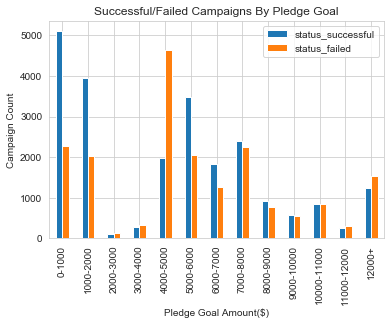

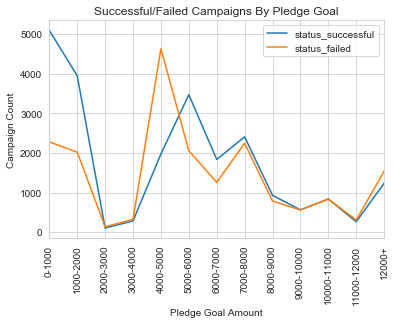

In [84]:
# DataFrame of state level deaths sums
#sdf = Successful_Only_Under_10000.groupby(['Goal_Cat_Num']).status_successful.count()
#recent_grads.head(2)

# Plot bar chart
success_failure_counts_1000.plot(kind="bar")



xlab = 'Pledge Goal Amount($)'
ylab = 'Campaign Count'
title = 'Successful/Failed Campaigns By Pledge Goal'
# Add axis labels

plt.xlabel(xlab) 
plt.ylabel(ylab)
# Add title
plt.title(title)


# Definition of tick_val and tick_lab
tick_val = [0,1,2,3,4,5,6,7,8,9,10, 11, 12]
tick_lab = ['0-1000','1000-2000','2000-3000','3000-4000','4000-5000','5000-6000','6000-7000','7000-8000','8000-9000','9000-10000','10000-11000','11000-12000','12000+']

# Adapt the ticks on the x-axis
plt.xticks(tick_val,tick_lab)

# Show graph
plt.show()

# DataFrame of deaths sums
#dfb = Successful_Only_Under_10000.groupby(['Goal_Cat_Num']).status_successful.sum()
#recent_grads.head(2)

# Plot bar chart
success_failure_counts_1000.plot(kind="line")

xlab = 'Pledge Goal Amount'
ylab = 'Campaign Count'
title = 'Successful/Failed Campaigns By Pledge Goal'
# Add axis labels

plt.xlabel(xlab) 
plt.ylabel(ylab)

# Add title
plt.title(title)


# Definition of tick_val and tick_lab
tick_val = [0,1,2,3,4,5,6,7,8,9,10, 11, 12]
tick_lab = ['0-1000','1000-2000','2000-3000','3000-4000','4000-5000','5000-6000','6000-7000','7000-8000','8000-9000','9000-10000','10000-11000','11000-12000','12000+']

# Adapt the ticks on the x-axis
plt.xticks(tick_val,tick_lab)
plt.xticks(rotation=90) 
# Show graph
plt.show()

**Conclusion:** As might be expected, campaigns asking for the least amount of money 0-2000 appear to have the highest success to failure ratios. An interesting surprise is that campaigns in the 5000 to 6000 range fair pretty well. If we break the 5000-6000 range down by category, we wonder if this might be a sweet spot for higher quality project types that require larger goals like Film or Music.   

In [85]:
GA_APP_full_5000_6000=GA_APP_full[GA_APP_full['Goal_Cat_1000'] == '5000-6000']
#GA_APP_full_5000_6000['category'].value_counts()
GA_APP_full_5000_6000['subcategory'].value_counts()

Documentary             158
Music                   148
Short Film              147
Other Film and Video    118
Theater                  85
Photography              77
Indie Rock               72
Fashion                  71
Comics                   66
Rock                     65
Food                     64
Nonfiction               63
Country & Folk           53
Fiction                  52
Narrative Film           49
Webseries                46
Children's Book          36
Pop                      32
Video Games              31
World Music              31
Dance                    29
Art                      29
Publishing               28
Classical Music          26
Jazz                     26
Public Art               24
Product Design           22
Board & Card Games       20
Hip-Hop                  17
Journalism               17
Performance Art          15
Sculpture                15
Painting                 14
Mixed Media              14
Animation                14
Open Software       

# Ideal Campaign Duration

To evaluate ideal campaign duration, we look at the effect of different durations on total amounts raised and average daily pledge.

In [86]:
GA_APP_full_below_9000=GA_APP_full[GA_APP_full['pledged']<9000]
GA_APP_full_below_9000=GA_APP_full_below_9000.sort_values('duration',ascending=True)
GA_APP_full_below_9000.head()

project id                                               name  \
25059  1175306310                        BjÛÎ_rk Swan Dress T-Shirt   
19805   931747986  CXL - Feature Film - The 24 Hour Kickstarter. ...   
36775  1728704935                 Help RonenV.com Get A New Camera!!   
42212  1978168386  &quot;The New Years Resolution Tour&quot;  Gas...   
26099  1227406138  Foldable Shoes for Purse- that won't get it di...   

                                                     url      category  \
25059  http://www.kickstarter.com/projects/thereport/...           Art   
19805  http://www.kickstarter.com/projects/sgillane/c...  Film & Video   
36775  http://www.kickstarter.com/projects/ronen/help...   Photography   
42212  http://www.kickstarter.com/projects/sandlother...         Music   
26099  http://www.kickstarter.com/projects/flipslip/f...       Fashion   

          subcategory           location      status    goal  pledged  \
25059  Conceptual Art       Brooklyn, NY  successful   180.0    472.0   
19805  Narrative Film  San Francisco, CA  successful  5000.0   5018.0   
36775     Photography                NaN  successful   500.0    500.0   
42212           Music      Bethlehem, PA  successful   200.0    201.0   
26099         Fashion  San Francisco, CA      failed   200.0      0.0   

       funded percentage  ...           timestamp time_delta_duration  \
25059           2.622222  ... 2012-02-17 17:00:00              1 days   
19805           1.003610  ... 2011-07-07 17:30:17              1 days   
36775           1.000000  ... 2009-12-01 23:05:00              1 days   
42212           1.005000  ... 2011-01-21 04:10:43              1 days   
26099           0.000000  ... 2011-11-29 10:35:18              1 days   

               Start_Date Start_Year  Start_Month  Start_DayofWeek  \
25059 2012-02-16 17:00:00       2012            2                3   
19805 2011-07-06 17:30:17       2011            7                2   
36775 2009-11-30 23:05:00       2009           11                0   
42212 2011-01-20 04:10:43       2011            1                3   
26099 2011-11-28 10:35:18       2011           11                0   

       Start_Hour  Start_DayofWeek_str  Start_Month_str  Start_Hour_str  
25059          17             Thursday         February             5pm  
19805          17            Wednesday             July             5pm  
36775          23               Monday         November            11pm  
42212           4             Thursday          January             4am  
26099          10               Monday         November            10am  

[5 rows x 41 columns]

In [87]:
####Note Outliers Hidden
fig = px.box(GA_APP_full_below_9000, x="Duration_Cat", y="pledged", points=False, title="Campaign Duration Effect on Total Pledged")
fig.update_layout(
    xaxis=dict(title='Campaign Duration(days)', zeroline=False),
    boxmode='group'
)

fig.update_layout(
    yaxis=dict(title='Amount Pledged($)', zeroline=False),
    boxmode='group'
)
fig.show()

In [88]:
df5 = GA_APP_full_below_9000[GA_APP_full_below_9000['Avg_Raised_Per_Day']<600]
fig = px.box(df5, x="Duration_Cat", y="Avg_Raised_Per_Day", title="Campaign Duration Effect on Average Daily Pledge")
fig.update_layout(
    xaxis=dict(title='Campaign Duration(days)', zeroline=False),
    boxmode='group'
)
fig.update_layout(
    yaxis=dict(title='Avg Daily Pledge($)', zeroline=False),
    boxmode='group'
)

fig.show()

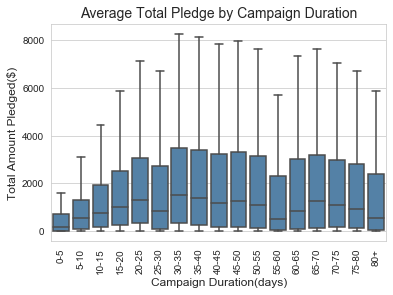

In [89]:
####Note Outliers Hidden
sns.set_style("whitegrid")
sns.boxplot(x='Duration_Cat', y="pledged", showfliers=False, color="steelblue", data=GA_APP_full_below_9000)
plt.xlabel("Campaign Duration(days)", size=12)
plt.ylabel("Total Amount Pledged($)", size=12)
plt.title("Average Total Pledge by Campaign Duration", size=14)
plt.xticks(rotation=90)

plt.show()



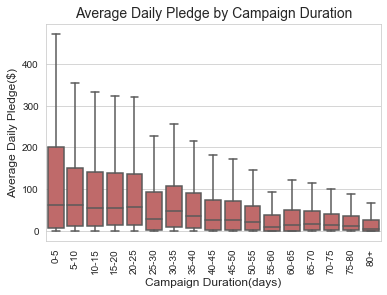

In [90]:
####Note Outliers Hidden
sns.set_style("whitegrid")
sns.boxplot(x='Duration_Cat', y="Avg_Raised_Per_Day", showfliers=False, color="indianred", data=df5)
plt.xlabel("Campaign Duration(days)", size=12)
plt.ylabel("Average Daily Pledge($)", size=12)
plt.title("Average Daily Pledge by Campaign Duration", size=14)
plt.xticks(rotation=90)

plt.show()

**Conclusion:** 30 to 40 day campaigns tended to raise higher median total pledge amounts and had slightly higher pledge ranges in middle 50th percentile. Pledge data suggests diminishing median daily returns over time, especially after 30-35 days. 

# Ideal Month/Day/Time for Campaign Launch:
This is the most complicated assessment. We use the metric average daily pledge to evaluate ideal start time. Unfortunately, for accurate estimates, we would like to look at weekly/daily/hourly data. As is often the case, we do not have such data. 

**Strategy**: To get better estimates of effects we limit our focus to shorter duration campaigns near events of interest. i.e. Day and Time of Campaign. This strategy has two major issues. Alternatively, we could have grouped some of the observations together reducing the necessary variation and tried to shorten the time frame that way. 

**Limitations**:

1) Because shortening the time frame reduces the number of observations and variation, we must be cautious not to do so too much. For instance, when assessing the effect of start time, reducing the time frame below 14 days lead to missing times and median calculations based on one or two observations. This could lead to false conclusions. 

2) Short campaigns may be fundamentally different than other campaign types. So, we may not be gettting an accurate overall picture. 

## Best Month Analysis
To determine the best month to start a campaign, we look at the entire data set. 

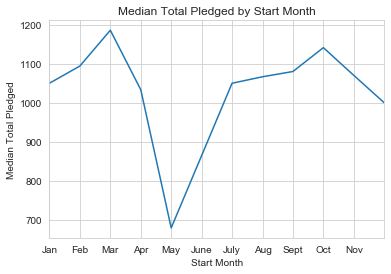

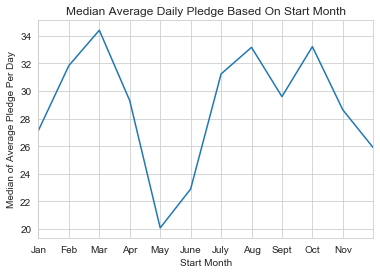

In [91]:
# DataFrame of Pledges Under 9850
Pledged_Under_9850=GA_APP_full[GA_APP_full['pledged']<=9850]

dfb = Pledged_Under_9850.groupby(['Start_Month']).pledged.median()

# Plot bar chart
dfb.plot(kind="line")

xlab = 'Start Month'
ylab = 'Median Total Pledged'
title = 'Median Total Pledged by Start Month' 
# Add axis labels

plt.xlabel(xlab) 
plt.ylabel(ylab)

# Add title
plt.title(title)

# Definition of tick_val and tick_lab
tick_val = [1,2,3,4,5,6,7,8,9,10,11]
tick_lab = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
# Adapt the ticks on the x-axis
plt.xticks(tick_val,tick_lab)

# Show graph
plt.show()

# DataFrame of deaths sums
dfb = Pledged_Under_9850.groupby(['Start_Month']).Avg_Raised_Per_Day.median()
#recent_grads.head(2)

# Plot bar chart
dfb.plot(kind="line")

xlab = 'Start Month'
ylab = 'Median of Average Pledge Per Day'
title = 'Median Average Daily Pledge Based On Start Month'
# Add axis labels

plt.xlabel(xlab) 
plt.ylabel(ylab)

# Add title
plt.title(title)

# Definition of tick_val and tick_lab
tick_val = [1,2,3,4,5,6,7,8,9,10,11]
tick_lab = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
# Adapt the ticks on the x-axis
plt.xticks(tick_val,tick_lab)

# Show graph
plt.show()

## Best Day of the Week Analysis
To determine the best day of the week to start a campaign, we look at data for campaigns lasting 7 days.

In [92]:
Length_Under_7=GA_APP_full[GA_APP_full['duration']<=7]
Length_Under_7=Length_Under_7[Length_Under_7['pledged']<=9850]
Length_Under_7.describe()

project id          goal      pledged  funded percentage     backers  \
count  2.240000e+02    224.000000   224.000000         224.000000  224.000000   
mean   1.146627e+09   1659.569196   717.294643           1.475719   19.017857   
std    5.969761e+08   4014.937135  1089.742843           4.510916   38.278536   
min    6.675804e+06      0.500000     0.000000           0.000000    0.000000   
25%    7.042717e+08    300.000000    34.250000           0.070268    2.000000   
50%    1.168263e+09    700.000000   370.000000           1.044545    8.000000   
75%    1.647997e+09   1200.000000   970.000000           1.393490   24.250000   
max    2.145776e+09  40000.000000  8581.000000          64.000000  437.000000   

           levels     updates    comments    duration  status_canceled  ...  \
count  224.000000  224.000000  224.000000  224.000000            224.0  ...   
mean     4.808036    1.642857    1.058036    5.350446              0.0  ...   
std      2.626824    3.178846    2.795132    1.788648              0.0  ...   
min      0.000000    0.000000    0.000000    1.000000              0.0  ...   
25%      3.000000    0.000000    0.000000    4.472500              0.0  ...   
50%      5.000000    0.000000    0.000000    5.945000              0.0  ...   
75%      6.000000    2.000000    1.000000    7.000000              0.0  ...   
max     16.000000   31.000000   24.000000    7.000000              0.0  ...   

       status_suspended  Avg_Raised_Per_Day  Percent_Pledged  Goal_Cat_Num  \
count             224.0          224.000000       224.000000    224.000000   
mean                0.0          164.534098         1.475938     10.446429   
std                 0.0          421.190784         4.511579      9.444518   
min                 0.0            0.000000         0.000000      0.000000   
25%                 0.0            9.059257         0.070268      2.000000   
50%                 0.0           73.131490         1.044545      7.000000   
75%                 0.0          187.200000         1.393490     19.000000   
max                 0.0         5018.000000        64.000000     25.000000   

       Goal_Cat_Num_1000     time_delta_duration   Start_Year  Start_Month  \
count         224.000000                     224   224.000000   224.000000   
mean            1.169643  5 days 08:24:38.571428  2011.138393     5.861607   
std             2.447249  1 days 18:55:39.165908     0.838293     3.249498   
min             0.000000         1 days 00:00:00  2009.000000     1.000000   
25%             0.000000         4 days 11:20:24  2011.000000     3.000000   
50%             0.000000         5 days 22:40:48  2011.000000     5.000000   
75%             1.000000         7 days 00:00:00  2012.000000     9.000000   
max            12.000000         7 days 00:00:00  2012.000000    12.000000   

      Start_DayofWeek  Start_Hour  
count      224.000000  224.000000  
mean         2.549107   13.183036  
std          1.808624    7.552357  
min          0.000000    0.000000  
25%          1.000000    5.000000  
50%          3.000000   16.000000  
75%          4.000000   19.000000  
max          6.000000   23.000000  

[8 rows x 23 columns]

In [93]:
###Count values in each category to assess level of observations per category: 
Length_Under_7['Start_DayofWeek_str'].value_counts()

Friday       48
Monday       39
Tuesday      37
Wednesday    35
Thursday     33
Saturday     19
Sunday       13
Name: Start_DayofWeek_str, dtype: int64

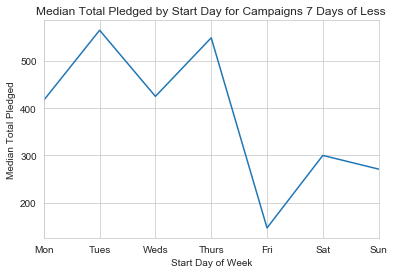

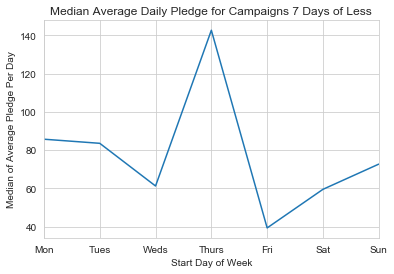

In [94]:
# DataFrame of Pledges Under 9850 and Under 7 Days Duration
dfb = Length_Under_7.groupby(['Start_DayofWeek']).pledged.median()
#recent_grads.head(2)

# Plot bar chart
dfb.plot(kind="line")

xlab = 'Start Day of Week'
ylab = 'Median Total Pledged'
title = 'Median Total Pledged by Start Day for Campaigns 7 Days of Less'
# Add axis labels

plt.xlabel(xlab) 
plt.ylabel(ylab)

# Add title
plt.title(title)


# Definition of tick_val and tick_lab
tick_val = [0,1,2,3,4,5,6]
tick_lab = ['Mon','Tues','Weds', 'Thurs', 'Fri', 'Sat', 'Sun']

# Adapt the ticks on the x-axis
plt.xticks(tick_val,tick_lab)

# Show graph
plt.show()

# DataFrame of deaths sums
dfb = Length_Under_7.groupby(['Start_DayofWeek']).Avg_Raised_Per_Day.median()
#recent_grads.head(2)

# Plot bar chart
dfb.plot(kind="line")

xlab = 'Start Day of Week'
ylab = 'Median of Average Pledge Per Day'
title = 'Median Average Daily Pledge for Campaigns 7 Days of Less'
# Add axis labels

plt.xlabel(xlab) 
plt.ylabel(ylab)

# Add title
plt.title(title)


# Definition of tick_val and tick_lab
tick_val = [0,1,2,3,4,5,6]
tick_lab = ['Mon','Tues','Weds', 'Thurs', 'Fri', 'Sat', 'Sun']

# Adapt the ticks on the x-axis
plt.xticks(tick_val,tick_lab)

# Show graph
plt.show()

## Best Time Analysis
To determine the best time to start a campaign, we look at data for campaigns lasting 14 days. Reducing our time frame beyond this level leaves out certain times and/or creates time categories with very few observations. Alternatively, we could try to group time categories with fewer observations. 

In [95]:
Length_Under_14=GA_APP_full[GA_APP_full['duration']<=14]
Length_Under_14=Length_Under_14[Length_Under_14['pledged']<=9850]

In [96]:
###Count values in each category to assess level of observations per category: 
Length_Under_7=Length_Under_7.sort_values('Start_Hour',ascending=True)
counts_under_7=pd.DataFrame(Length_Under_7['Start_Hour'].value_counts())
counts_under_7=counts_under_7.sort_index()
counts_under_7.reset_index(drop=False, inplace=True)
counts_under_7.columns = ['Start Hour','Obs Count']
counts_under_7

Start Hour  Obs Count
0            0         11
1            1          7
2            2          8
3            3         14
4            4         10
5            5         11
6            6          3
7            7          3
8            8          4
9            9          5
10          10          3
11          11          1
12          12          4
13          13          7
14          14         10
15          15          8
16          16         17
17          17         15
18          18         15
19          19         15
20          20          8
21          21         13
22          22         14
23          23         18

In [97]:
###Count values in each category to assess level of observations per category: 

counts_Under_14=pd.DataFrame(Length_Under_14['Start_Hour'].value_counts())
counts_Under_14=counts_Under_14.sort_index()
counts_Under_14.reset_index(drop=False, inplace=True)
counts_Under_14.columns = ['Start Hour','Obs Count']
counts_Under_14


Start Hour  Obs Count
0            0         54
1            1         63
2            2         48
3            3         54
4            4         49
5            5         45
6            6         35
7            7         19
8            8         18
9            9         14
10          10         14
11          11         11
12          12         20
13          13         24
14          14         42
15          15         55
16          16         79
17          17         91
18          18         77
19          19         84
20          20         68
21          21         81
22          22         86
23          23         73

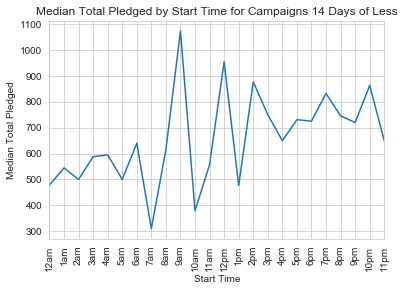

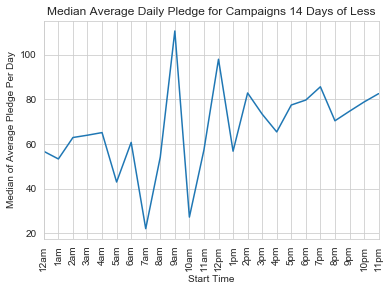

In [98]:
### Since using campaigns lasting up to two weeks gives us more variety, 
#we decide to use that as our time frame. 

# DataFrame of Pledges Under 9850 and Under 14 Days Duration
dfb = Length_Under_14.groupby(['Start_Hour']).pledged.median()
#recent_grads.head(2)

# Plot bar chart
dfb.plot(kind="line")

xlab = 'Start Time'
ylab = 'Median Total Pledged'
title = 'Median Total Pledged by Start Time for Campaigns 14 Days of Less'
# Add axis labels

plt.xlabel(xlab) 
plt.ylabel(ylab)

# Add title
plt.title(title)
# Definition of tick_val and tick_lab
tick_val =[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
tick_lab = ['12am','1am','2am','3am','4am','5am','6am','7am','8am','9am','10am','11am','12pm','1pm','2pm','3pm','4pm','5pm','6pm','7pm','8pm','9pm','10pm', '11pm']
# Adapt the ticks on the x-axis
plt.xticks(tick_val,tick_lab)
plt.xticks(rotation=90)
# Show graph
plt.show()

# DataFrame of deaths sums
dfb = Length_Under_14.groupby(['Start_Hour']).Avg_Raised_Per_Day.median()
#recent_grads.head(2)

# Plot bar chart
dfb.plot(kind="line")

xlab = 'Start Time'
ylab = 'Median of Average Pledge Per Day'
title = 'Median Average Daily Pledge for Campaigns 14 Days of Less'
# Add axis labels

plt.xlabel(xlab) 
plt.ylabel(ylab)

# Add title
plt.title(title)
# Definition of tick_val and tick_lab
tick_val =[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
tick_lab = ['12am','1am','2am','3am','4am','5am','6am','7am','8am','9am','10am','11am','12pm','1pm','2pm','3pm','4pm','5pm','6pm','7pm','8pm','9pm','10pm', '11pm']
# Adapt the ticks on the x-axis
plt.xticks(tick_val,tick_lab)
plt.xticks(rotation=90)
# Show graph
plt.show()

**Conclusion:** Campaigns starting at 9am, on Thursday, or in March had higher daily contributions on average and some of the highest totals raised. 

Note: Campaigns raising over $9,850 removed as unrepresentative of the typical campaign. Time conclusions should again be taken with a grain of salt. The data lacked hour level information. For better predictions of start time effect, more granular pledge data near start time is required. 